# 🐧 Análise de Qualidade dos Dados - Base Penguins

> _Neste notebook, exploramos estratégias de tratamento de **valores ausentes** e **registros duplicados** em uma base pública sobre pinguins._

# 🏡 Base Utilizada

A base `penguins` contém 344 registros com características físicas de pinguins de três espécies diferentes coletadas em ilhas do arquipélago Palmer, na Antártica. Os atributos disponíveis possibilitam análises morfológicas, de distribuição geográfica e comparações entre grupos.


## 📄 Atributos da base:

`species`: espécie do pinguim (Adelie, Chinstrap ou Gentoo)

`island`: ilha onde o indivíduo foi observado (Biscoe, Dream ou Torgersen)

`bill_length_mm, bill_depth_mm`: comprimento e profundidade do bico (em milímetros)

`flipper_length_mm`: comprimento da nadadeira (em milímetros)

`body_mass_g`: massa corporal (em gramas)

`sex`: sexo do pinguim (male ou female)

`year`: ano da observação

## 📚 Bibliotecas Utilizadas
- pandas
- numpy
- matplotlib e seaborn (opcional, para visualização)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Base da ação (carregamento da base)

In [20]:
# Carregar a base penguins diretamente do GitHub
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Visualizar as 5 primeiras linhas
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Informações iniciais sobre a base

In [21]:
# Dimensões da base
print("Dimensões:", df.shape)

# Informações gerais
df.info()

# Estatísticas descritivas
df.describe()

Dimensões: (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# 📌 Objetivo
Aplicar e comparar diferentes estratégias de tratamento de dados ausentes e duplicados.

# 🧼 Tratamento de Dados Ausentes 

Detectar e tratar dados ausentes 

## 🛠️ Estratégias de tratamento de dados ausentes

Verificar se há dados ausentes.

In [24]:
# Exibe apenas colunas com dados ausentes
df.isnull().sum()[df.isnull().sum() > 0]

bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Foi possivel observar que as variáveis `bill_length_mm`, `bill_depth_mm`,`flipper_length_mm`, `body_mass_g` e `sex` contêm valores ausentes. 
Aplicaremos três abordagens para tratá-los:
1. Remoção das linhas com `NaN`
2. Imputação com a média
3. Imputação com a mediana


Abordagem 1 : Remoção de linhas com valores ausentes
 - Casos em que quando a quantidade de dados ausentes é pequena e sua remoção não compromete a representatividade da base.


In [28]:
df_dropna = df.dropna()
df_dropna.shape

(333, 7)

Abordagem 2: Imputação com a média
- Recomendado para variáveis numéricas simétricas ou com poucos outliers. Substitui os NaNs pela média da coluna.


In [ ]:
df_mean = df.copy()
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in num_cols:
    df_mean[col] = df_mean[col].fillna(df_mean[col].mean())

Abordagem 3: Imputação com a mediana
- Recomendado para variáveis numéricas com distribuição assimétrica ou presença de outliers.


In [30]:
df_median = df.copy()
for col in num_cols:
    df_median[col] = df_median[col].fillna(df_median[col].median())

 Abordagem: Variável categórica - Imputação com a moda 

In [32]:
df_moda = df.copy()
moda_sex = df_moda["sex"].mode()[0]
df_moda["sex"] = df_moda["sex"].fillna(moda_sex)

## Comparações

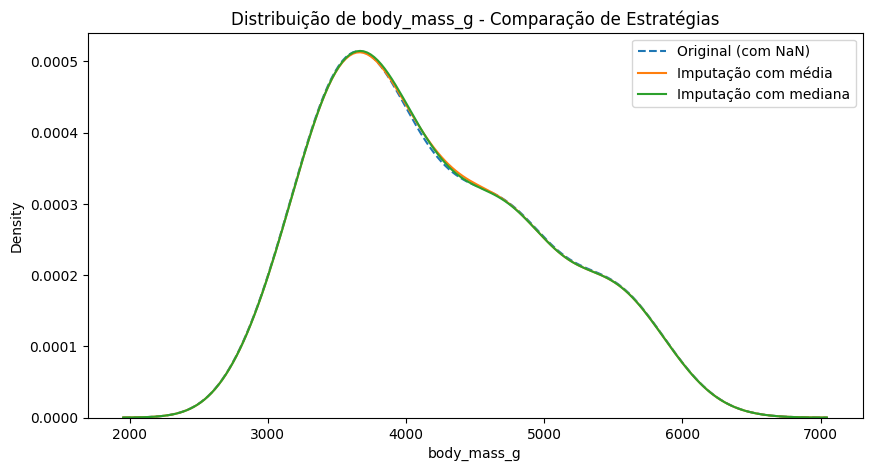

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(df["body_mass_g"], label="Original (com NaN)", linestyle="--")
sns.kdeplot(df_mean["body_mass_g"], label="Imputação com média")
sns.kdeplot(df_median["body_mass_g"], label="Imputação com mediana")
plt.title("Distribuição de body_mass_g - Comparação de Estratégias")
plt.legend()
plt.show()

A análise da densidade revela que, embora semelhantes, as distribuições da variável `body_mass_g` apresentam leves diferenças conforme a estratégia de imputação utilizada (média ou mediana), evidenciando o impacto que a escolha do método pode ter na análise.

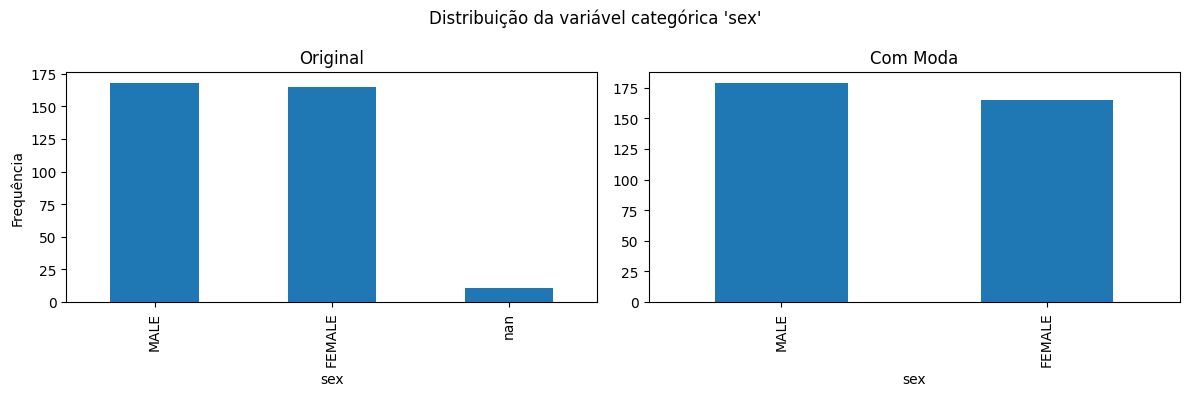

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df["sex"].value_counts(dropna=False).plot(kind="bar", ax=axes[0], title="Original")
df_moda["sex"].value_counts().plot(kind="bar", ax=axes[1], title="Com Moda")

axes[0].set_ylabel("Frequência")
plt.suptitle("Distribuição da variável categórica 'sex'")
plt.tight_layout()
plt.show()


## 📈 Considerações finais

A remoção dos nulos reduziu o número total de observações, podendo prejudicar análises futuras — especialmente em bases pequenas ou desbalanceadas.

A imputação com **média** ou **mediana** preserva o tamanho da base, mas insere valores estimados que podem afetar a distribuição original das variáveis.

A escolha da estratégia depende do **contexto analítico**, da **quantidade de valores ausentes** e da **importância da variável** no modelo ou nas decisões que se pretende tomar.

O ideal é sempre **avaliar o impacto da imputação na variável-alvo**, quando aplicável, especialmente em tarefas supervisionadas.

💡**Nota técnica**: embora a média seja amplamente usada, a mediana é geralmente preferida em ambientes profissionais por ser menos sensível a outliers e preservar melhor a distribuição central dos dados.

# 🧼 Tratamento de Dados Duplicados 

Detectar e tratar registros duplicados 

## 🔍 Verificação de Duplicatas

✅ Checagem de Duplicatas Completas

In [36]:
# Número de duplicatas completas
duplicatas = df.duplicated()
print(f"Total de duplicatas completas: {duplicatas.sum()}")

# Visualização (caso existam)
df[duplicatas].head()


Total de duplicatas completas: 0


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


Caso houvesse existência de registros duplicados, nenhum deles é **necessariamente inválido**. Como não há um identificador único por indivíduo (como ID ou timestamp), registros idênticos podem representar diferentes observações reais com atributos coincidentes.

🧩 Duplicatas Parciais (Subconjuntos de Colunas)
É possível que existam registros duplicados em algumas colunas, mas com diferenças em outras. Vamos analisar, por exemplo, duplicatas com base em `species`, `island`, `sex`.

In [37]:
# Verificando duplicatas em colunas específicas
duplicatas_parciais = df.duplicated(subset=["species", "island", "sex"])
print(f"Duplicatas parciais em 'species', 'island' e 'sex': {duplicatas_parciais.sum()}")


Duplicatas parciais em 'species', 'island' e 'sex': 331


Essas duplicações **não indicam erro**, pois indivíduos da mesma espécie e ilha podem compartilhar sexo e demais características registradas.

- Nenhuma duplicata será removida nesta etapa.

- A simples presença de duplicatas não implica problema de qualidade.

- A decisão de remoção ou agregação exige contexto adicional (como rastreamento individual, fonte da base ou objetivo analítico específico).

## 🧽 Estratégias de Tratamento
- Remoção direta com `drop_duplicates()`
- Retenção condicional de registros (`keep='first'`, `keep='last'`)


Apenas para mostrar como lidar com as duplicatas elas vão ser incluidas artificialmente e serão utilizadas as seguintes técnicas.

In [49]:
# Criar duplicatas artificiais (com garantia de registros completos)
df_sem_nulos = df.dropna()
duplicatas_artificiais = df_sem_nulos.sample(10, random_state=42)
df_dup = pd.concat([df, duplicatas_artificiais], ignore_index=True)

# Verificar total de duplicatas completas
duplicatas = df_dup.duplicated()
total_duplicatas = duplicatas.sum()
print(f"Total de duplicatas adicionadas: {total_duplicatas}")

# Exibir algumas duplicatas
print("\nExemplos de duplicatas:")
display(df_dup[duplicatas].head())

Total de duplicatas adicionadas: 10

Exemplos de duplicatas:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
344,Adelie,Dream,39.5,16.7,178.0,3250.0,FEMALE
345,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,FEMALE
346,Adelie,Torgersen,42.1,19.1,195.0,4000.0,MALE
347,Chinstrap,Dream,49.8,17.3,198.0,3675.0,FEMALE
348,Adelie,Biscoe,41.1,18.2,192.0,4050.0,MALE


* Remoção direta com `drop_duplicates()`

Descarta todos os registros duplicados.

In [57]:
## Remoção direta
df_sem_dups = df_dup.drop_duplicates(keep=False)

- Retenção condicional de registros (`keep='first'`, `keep='last'`)

A retenção com keep='first' ou 'last' permite preservar informações mais relevantes conforme o contexto.

In [51]:
# Mantém a primeira ocorrência
df_keep_first = df_dup.drop_duplicates(keep='first')
# Mantém a última ocorrência
df_keep_last = df_dup.drop_duplicates(keep='last')

In [58]:
# Comparar tamanhos e verificar duplicatas após cada estratégia

print("\n📊 Comparação após remoção completa (padrão):")
print(f"- Antes: {df_dup.shape[0]} linhas")
print(f"- Após: {df_sem_dups.shape[0]} linhas")
print(f"- Removidas: {df_dup.shape[0] - df_sem_dups.shape[0]}")
print(f"- Duplicatas restantes: {df_sem_dups.duplicated().sum()}")

print("\n📊 Comparação com keep='first':")
print(f"- Após: {df_keep_first.shape[0]} linhas")
print(f"- Removidas: {df_dup.shape[0] - df_keep_first.shape[0]}")
print(f"- Duplicatas restantes: {df_keep_first.duplicated().sum()}")

print("\n📊 Comparação com keep='last':")
print(f"- Após: {df_keep_last.shape[0]} linhas")
print(f"- Removidas: {df_dup.shape[0] - df_keep_last.shape[0]}")
print(f"- Duplicatas restantes: {df_keep_last.duplicated().sum()}")



📊 Comparação após remoção completa (padrão):
- Antes: 354 linhas
- Após: 334 linhas
- Removidas: 20
- Duplicatas restantes: 0

📊 Comparação com keep='first':
- Após: 344 linhas
- Removidas: 10
- Duplicatas restantes: 0

📊 Comparação com keep='last':
- Após: 344 linhas
- Removidas: 10
- Duplicatas restantes: 0


## ✅ Conclusão

- Na base `penguins`, adicionamos duplicatas artificiais.
- A remoção direta com `drop_duplicates()` e as abordagens condicionais com `keep='first'` e `keep='last'` resultaram no mesmo número final de linhas, pois cada registro duplicado aparecia apenas **duas vezes**.
- Nesse contexto, manter a primeira ou a última ocorrência não faz diferença prática — ambas removem uma das duas cópias.
- A diferença entre `keep='first'` e `keep='last'` só se torna relevante quando há **três ou mais cópias do mesmo registro**.
- Vale destacar que o padrão do método `drop_duplicates()` é `keep='first'`. Para remover **todas** as ocorrências duplicadas, inclusive a primeira, é necessário usar `keep=False`.

> 💡 A escolha entre manter ou remover registros duplicados deve considerar o objetivo da análise e a relevância de cada linha de dados.
